In [18]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings("ignore")

In [19]:
def clf(x):
    pred_class = "Cents"
    if x['ring_1_s_kurtosis'] <= 0.887:
        if x['ring_3_h_std'] <= 50.993:
            if x['ring_3_s_kurtosis'] <= -0.461:
                pred_class = "Nickels"
            else:
                pred_class = "Quarters"
        else:
            if x['ring_2_s_std'] <= 52.097:
                pred_class = "Quarters"
            else:
                pred_class = "Cents"
    else:
        if x['ring_2_v_kurtosis'] <= -1.311:
            pred_class = "Nickels"
            if x['ring_4_magnitude_median'] <= 0.707:
                pred_class = "Quarters"
            else:
                pred_class = "Cents"
    
    return pred_class

In [20]:
from extract_features import extract_image_features, extract_features_single_image, crop_coins_from_background

coin_features_df = extract_image_features('./test/test_img5.jpg')
coin_features_df

Cropped 1/4
Cropped 2/4
Cropped 3/4
Cropped 4/4


s_std  ring_1_s_kurtosis  ring_2_s_std  ring_2_v_kurtosis  \
0  12.427170          -0.081046     13.551491          -1.869202   
1  18.769460          14.973582     20.076345          -1.818864   
2  51.078779          -1.321188     55.175503          -1.895573   
3  12.211789          37.954010     12.594003          -1.710142   

   ring_3_h_std  ring_3_s_kurtosis  ring_4_magnitude_median  
0     52.539053          -1.554222                 8.944272  
1     52.297831           0.999745                 6.324555  
2     54.018351          -1.734241                10.770330  
3     52.217953          48.317342                21.260292

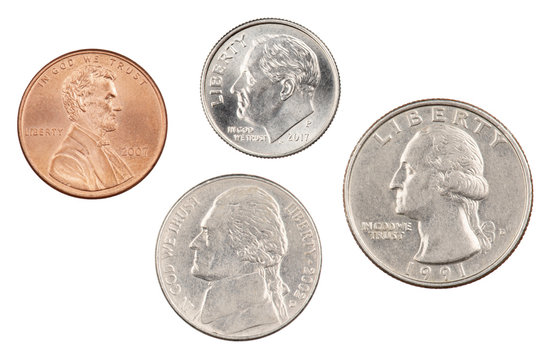

In [21]:
Image.open('./test/test_img5.jpg')

In [22]:
coin_features_df.apply(clf, axis = 1)

0    Quarters
1       Cents
2       Cents
3       Cents
dtype: object

# Real pics

In [23]:
def clf_coins(img_path):
    temp = cv2.imread(img_path)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    plt.imshow(temp)

    del temp

    cropped_objects = crop_coins_from_background(img_path)
    
    fig, axs = plt.subplots(1, len(cropped_objects), figsize = (20, 8))
    for i, (cropped_obj, ax) in enumerate(zip(cropped_objects, axs)):
        pred_label = extract_features_single_image(cropped_obj).apply(clf, axis = 1)[0]

        ax.imshow(cv2.cvtColor(cropped_obj, cv2.COLOR_BGR2RGB))
        ax.set_title(f'Object {i + 1}\nClass: {pred_label}')
        ax.axis('off')
    fig.tight_layout()
    plt.show()

In [24]:
clf_coins('./real_life_pic/IMG_1768.jpg')

Cropped 1/8
Cropped 2/8
Cropped 3/8
Cropped 4/8
Cropped 5/8
Cropped 6/8
Cropped 7/8
Cropped 8/8


Cropped 1/15
Cropped 2/15
Cropped 3/15
Cropped 4/15
Cropped 5/15
Cropped 6/15
Cropped 7/15
Cropped 8/15
Cropped 9/15
Cropped 10/15
Cropped 11/15
Cropped 12/15
Cropped 13/15
Cropped 14/15
Cropped 15/15


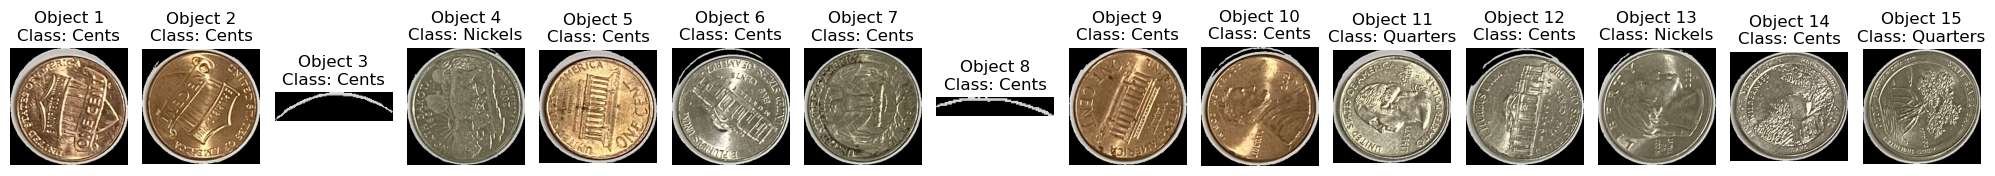

In [25]:
clf_coins('./real_life_pic/IMG_1769.jpg')

Cropped 1/6
Cropped 2/6
Cropped 3/6
Cropped 4/6
Cropped 5/6
Cropped 6/6


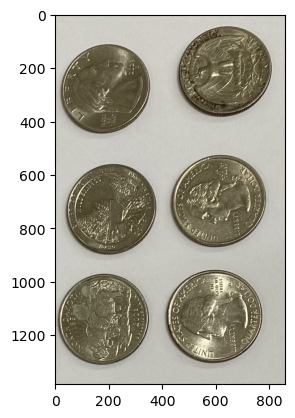

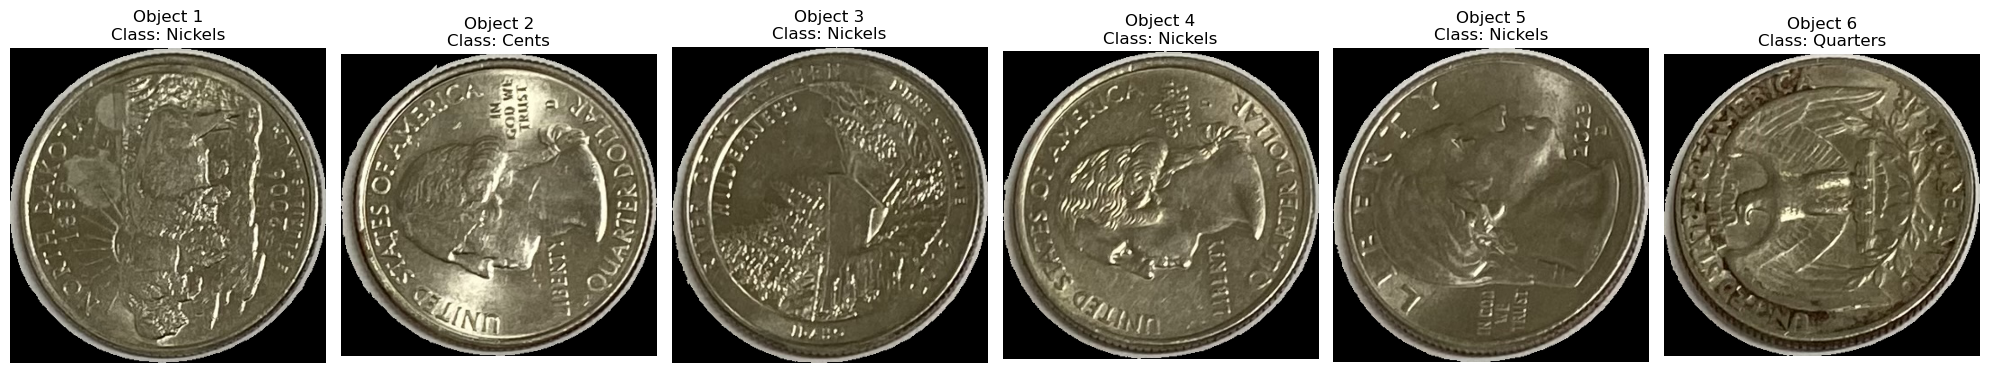

In [26]:
clf_coins('./real_life_pic/IMG_1770.jpg')

Exception: Detected 80 [TOO MANY, FAILED]

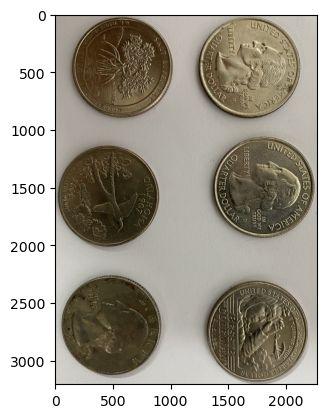

In [27]:
clf_coins('./real_life_pic/IMG_1771.jpg')

Exception: Detected 60 [TOO MANY, FAILED]

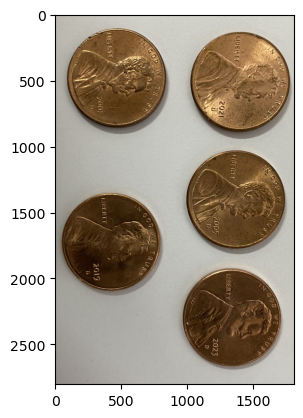

In [ ]:
clf_coins('./real_life_pic/IMG_1772.jpg')

Cropped 1/8
Cropped 2/8
Cropped 3/8
Cropped 4/8
Cropped 5/8
Cropped 6/8
Cropped 7/8
Cropped 8/8


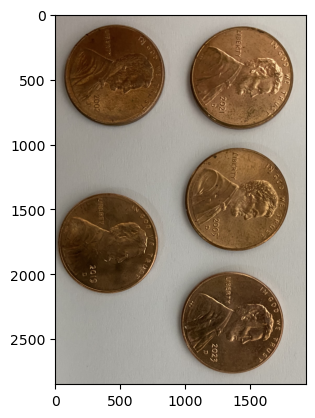

In [ ]:
clf_coins('./real_life_pic/IMG_1773.jpg')

Cropped 1/5
Cropped 2/5
Cropped 3/5
Cropped 4/5
Cropped 5/5


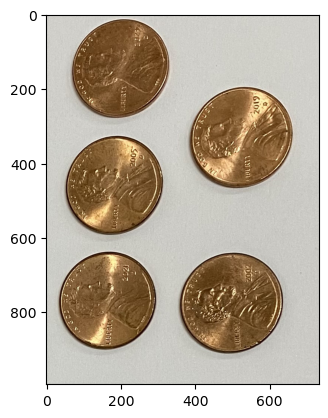

In [ ]:
clf_coins('./real_life_pic/IMG_1774.jpg')

Exception: Detected 30 [TOO MANY, FAILED]

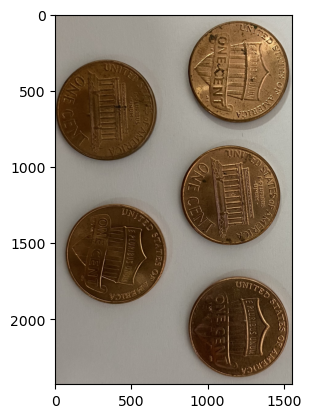

In [ ]:
clf_coins('./real_life_pic/IMG_1775.jpg')

Cropped 1/5
Cropped 2/5
Cropped 3/5
Cropped 4/5
Cropped 5/5


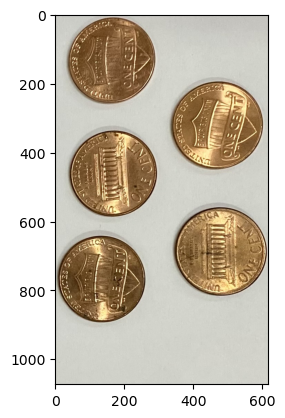

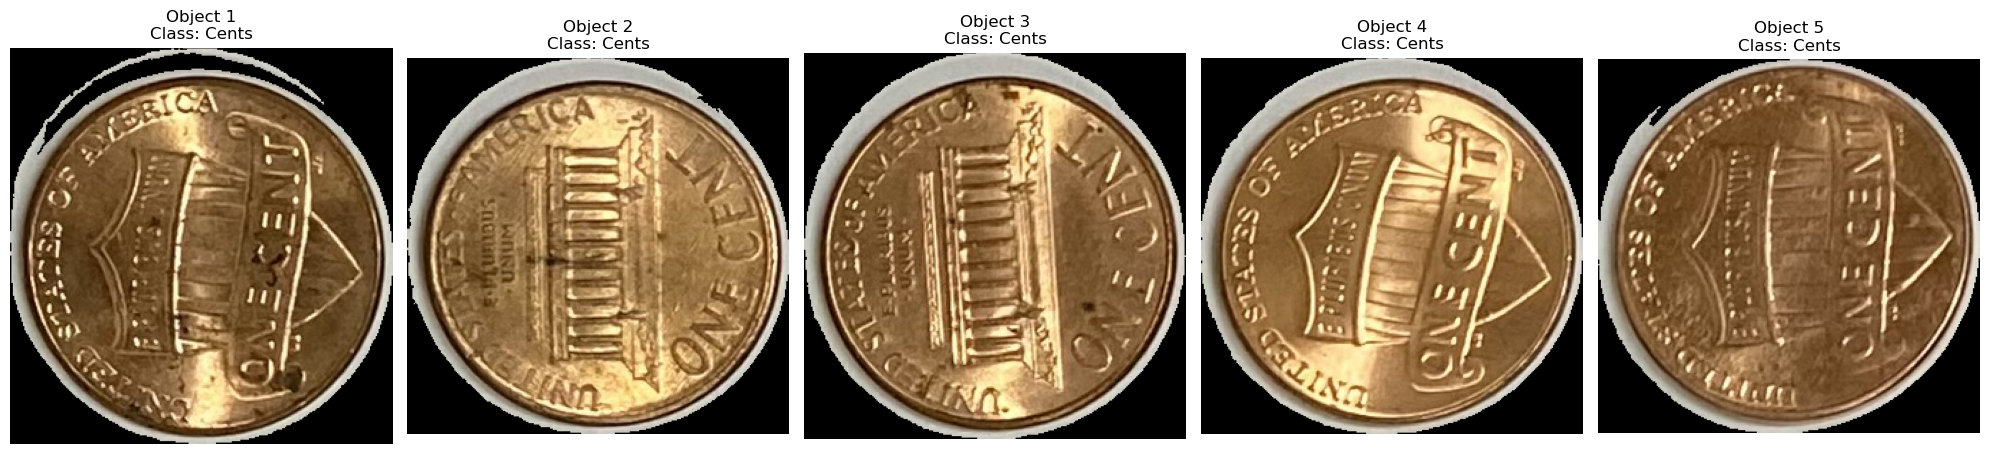

In [ ]:
clf_coins('./real_life_pic/IMG_1776.jpg')

Cropped 1/2
Cropped 2/2


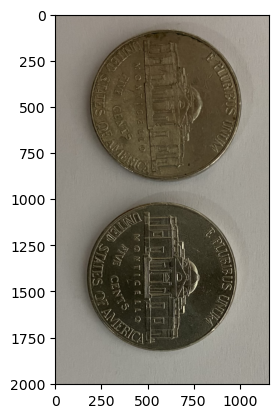

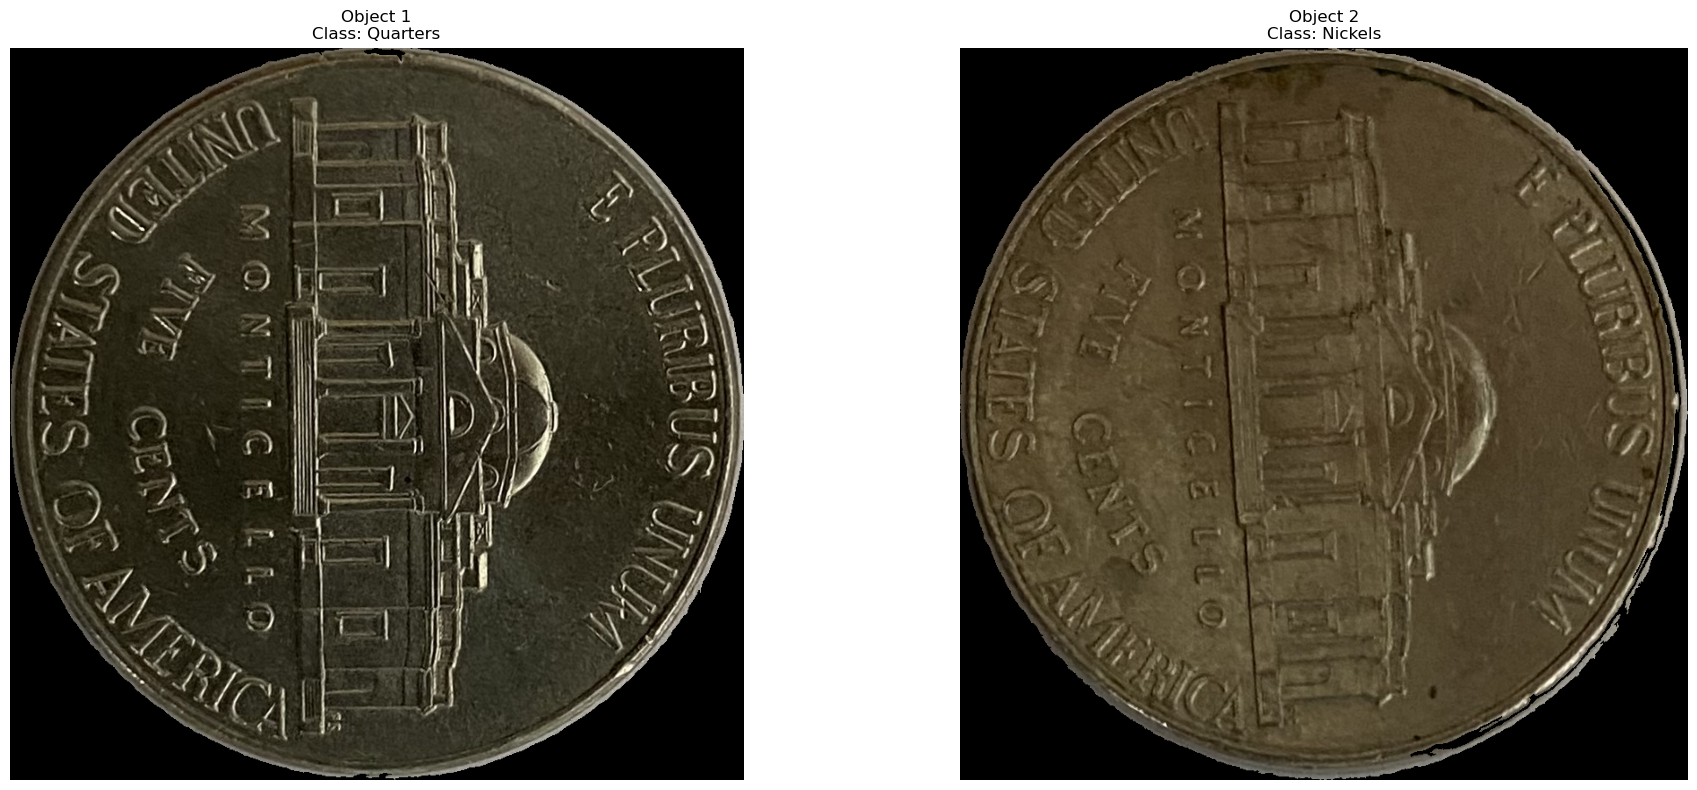

In [ ]:
clf_coins('./real_life_pic/IMG_1777.jpg')

Exception: Detected 26 [TOO MANY, FAILED]

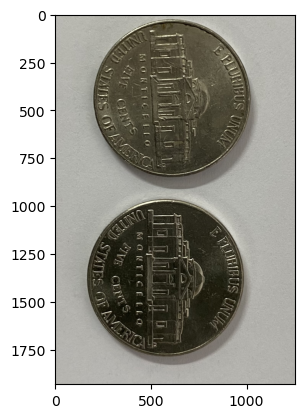

In [ ]:
clf_coins('./real_life_pic/IMG_1778.jpg')

In [28]:
clf_coins('./real_life_pic/IMG_1779.jpg')

Exception: Detected 55 [TOO MANY, FAILED]